# FIT5211 Algorithms and Data Structures

### Use the ADT class for points in 2-dimensional Euclidean space discussed in the lecture in Week 2 (see lecture notes), and extend the class this with a distance function for pairwise Manhattan distance.

<u>Import Libraries</u>

In [2]:
from math import *
import sys
import random
import timeit
import matplotlib.pyplot as plt

In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance_from_origin(self):
        return sqrt(self.x * self.x + self.y * self.y)

    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx * dx + dy * dy)

    def translate(self, dx, dy):
        self.x += dx
        self.y += dy

    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"

    # return the Manhattan distance of two points
    # |x_1 - x_2| + |y_1 - y_2|
    def distance_Manhattan(self, other):
        return abs(self.x - other.x) + abs(self.y - other.y)

### Based on this point class, implement an ADT class that models a **point set**. It will need a **constructor** as well as functions to **insert** and **delete** points in the set (you do not need to implement union, intersection, or other set operations at this point).

### Extend the point set class with a method to find the closest pair of points. Your method should **return the coordinates of the two points that have the smallest pairwise distance** in the set as well as this distance. Bear in mind that we are now using Manhattan distance. Give a brief discussion what (if anything) you need to change in the algorithm to accomodate Manhattan distance and justify your answer_ precisely. Implement two diff erent versions as methods in the point set class you have implemented above:

- a. Implement the naive O(n^2 ) ** brute-force ** algorithm. 
- b. Implement the **divide-and-conquer** algorithm.

In [4]:
# question 2
class PointSet:
    def __init__(self):
        self.items = []

    def insert(self, x):
        self.items.append(x)

    def delete(self, x):
        self.items.remove(x)
    
    def __str__(self):
        content = ""
        for i in self.items:
            content = content + str(i)
        return content
        
    # question 3.a brute-force
    def closetPointBF(self, l):
        result = [None] * 2
        if len(l) < 2:
            result[0] = l[0]
            tempPoint = Point(sys.maxsize, sys.maxsize)
            result[1] = tempPoint
            return result

        dmin = sys.maxsize
        for i in range(len(l) - 1):
            for j in range(i + 1, len(l)):
                tmpmin = l[i].distance_Manhattan(l[j])
                if tmpmin < dmin and tmpmin != 0:
                    dmin = tmpmin
                    result[0] = l[i]
                    result[1] = l[j]
        return result
    
    # question 3.b divide-and-conquer
    def closePairOfPointsDandC(self, l):
        # brute force if the num of points is not much
        if len(l) <= 10:
            return self.closetPointBF(l)
        else:
            # get the mid point of all points by their Xs
            minX = sys.maxsize # initial min X big enough
            maxX = -sys.maxsize - 1 # initial max X small enough
            for p in l:
                if p.x < minX:
                    minX = p.x
                if p.x > maxX:
                    maxX = p.x
            midX = (minX + maxX) // 2

            # split into 2 different list
            leftList = []
            rightList = []
            for point in l:
                if point.x <= midX:
                    leftList.append(point)
                if point.x > midX:
                    rightList.append(point)

            sorted(leftList,key = lambda p:p.x)
            sorted(rightList, key = lambda p: p.x)

            # get the pair of points that are closest from left half and right half
            leftResult = self.closePairOfPointsDandC(leftList)
            rightResult = self.closePairOfPointsDandC(rightList)
            # get the minmum distance of two sides
            dist1 = leftResult[0].distance_Manhattan(leftResult[1])
            dist2 = rightResult[0].distance_Manhattan(rightResult[1])

            minDist = sys.maxsize
            result = [None] * 2

            if dist1 <= dist2 and dist1 != 0:
                minDist = dist1
                result = leftResult
            if dist1 > dist2 and dist2 != 0:
                minDist = dist2
                result = rightResult

            midList = []
            for point in leftList:
                if midX - point.x < minDist:
                    midList.append(point)
            for point in rightList:
                if point.x - midX < minDist:
                    midList.append(point)
            sorted(midList, key = lambda p:p.y)

            # get possible pair of points from leftMidLineList and rightMidLineList
            if len(midList) < 10 and len(midList) >= 2:
                if midList[0].distance_Manhattan(midList[1]) < minDist \
                        and midList[0].distance_Manhattan(midList[1]) != 0:
                    result = midList
            else:
                for i in range(len(midList) - 7):
                    for j in range(1, 8):
                        if i + j >= len(midList):
                            break
                        else:
                            tempd = midList[i].distance_Manhattan(midList[i + j])
                            if tempd < minDist and tempd != 0:
                                result[0] = midList[i]
                                result[1] = midList[i + j]
            return result

### Perform an ** empirical runtime evaluation ** for both your algorithms using the Python timeit library. Plot runtime graphs for both algorithms for a reasonable rage of input sizes (you do not need to plot these using Python, but you are of course welcome to do so). Discuss briefly whether your plots substantiate your expectations.

In [5]:
bfTime = []
dncTime = []
noOfPoints = []
def testBF(numOfPoints):
    ps = PointSet()
    for i in range(numOfPoints):
        p = Point(random.randint(1, 2000), random.randint(1, 2000))
        ps.insert(p)
    r = ps.closetPointBF(ps.items)
    
def testDC(numOfPoints):
    ps = PointSet()
    for i in range(numOfPoints):
        p = Point(random.randint(1, 2000), random.randint(1, 2000))
        ps.insert(p)
    r = ps.closePairOfPointsDandC(ps.items)

if __name__=='__main__':
    from timeit import Timer
    for numOfPoints in range(10, 1000, 10):
        tBF = Timer(lambda: testBF(numOfPoints)).timeit(number=1)
        tDC = Timer(lambda: testDC(numOfPoints)).timeit(number=1)
        bfTime.append(tBF)
        dncTime.append(tDC)
        noOfPoints.append(numOfPoints)
    print("The list of numbers of points for testing:", noOfPoints)
    print("The time cost by using brute-force algorithm:", bfTime)
    print("The time cost by using divide-and-conquer algorithm:", dncTime)

The list of numbers of points for testing: [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]
The time cost by using brute-force algorithm: [0.00014662199828308076, 0.0002841850000550039, 0.0010712319999583997, 0.0008716230004210956, 0.0016828730003908277, 0.002187001002312172, 0.0029027280033915304, 0.004290184995625168, 0.00467763000051491, 0.004876276005234104, 0.005341096002666745, 0.007227955000416841, 0.006990526002482511, 0.009084163000807166, 0.01092812199931359, 0.010568683996098116, 0.012376500999380369, 0.014804432001255918, 0.016236128998571075, 

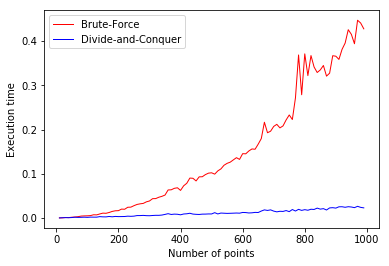

In [6]:
plt.plot(noOfPoints, bfTime , 'r-' , label='Brute-Force', linewidth=1)
plt.plot(noOfPoints, dncTime , 'b-' , label='Divide-and-Conquer', linewidth=1)
plt.ylabel('Execution time')
plt.xlabel('Number of points')
plt.legend(loc='upper left')
plt.show()

From the picture above we can easily find that, with the increasing of the number of points, **the time that used by using "Brute-Force" is quite longer than the "Divide-and-Conquer"**. The graph of the execution time of the "Brute-Force" one is like the the function of y = x^2, which is like the time complexity (**O(n^)**) of it. While the "Divide-and-Conquer"'s graph fits the graph of function y = nlogn, which can be said as "substantiating my expectations" that the time complexity of "Divide-and-Conquer" is **O(nlogn)**.

### Define the runtime recurrence relation that would arise if you would not pass sorted lists down the recursion but instead would sort the lists explicitly on each level of the recursion

As we discussed during the lecture before, the runtime recurrence relation of passing "pre-sorting" lists to the function is like: 

* T(1) = O(1)
* T(n) = 2\*T(n/2) + O(n) + O(1) + O(n) + O(1)

And actually, when we are trying to use "sorted()" function inside the "Divide-and-Conquer" algorithm, which is using the "TimSort" algorithm and its worst case time complexity is O(nlogn), so the runtime recurrence relation should be like:

* T(1) = O(1)
* T(n) = 2 \* T(n/2) + O(n) + O(1) + O(n) + O(1) + 3 \* O(nlogn)

so:
* T(n) = k \* T(n/k) + 3(k - 1)O(nlogn)

as a result, the time complexity of "Divide-and-Conquer" funtion should be ** O(nlogn) ** 